# Project 1: geometry optimization


The code template below is another Python recipe from *the IPython Cookbook, Second Edition* by Cyrille Rossant, the online text we used to explore the bifurcation diagram of the logistic map. You can find relevant explanations on the code in chapter 9.4 [Finding the equilibrium state of a physical system by minimizing its potential energy](https://github.com/ipython-books/cookbook-2nd/blob/master/chapter09_numoptim/04_energy.md)

This project will require you to find minimal energy configurations of a bar made of a system of masses connected by springs. You will work with increasingly complex scenarios that will test the limits of your computing devices, and that will become increasingly realistic analogies of the process of discovering new properties of materials.

(1) Increase the number of masses in the system, while keeping the length of the bar constant, for several values of number of masses. are the results you obtain physically plausible?

Repeat the process by keeping the initial distance among the masses constant.

(2) Now suppose there is a certain proportion $Q$ of masses that are heavier, namely of mass $\tilde m=2m$. Modify the code below so that these heavier masses are randomly distributed in the system.

(3) Change the stiffness $k$ of the springs attached to a pair of masses $(m_i,m_j)$ according to the function $k=10000*(\frac{m_im_j}{(0.1)^2)})^{0.5}$, i.e. the heavier the masses, the stiffer the spring connecting them. 

Once more, explore the resulting shape of the bar in equilibrium, and determine whether it is plausible.

N.B. There are multiple strings attached to each mass. 

(4) Consider a number of masses up to $n=10^3$ (if your computational resources allow it), and find which is the optimal proportion $Q$ of heavier masses that, on average, will maximize bending of the bar. 

N.B. you will need to test which optimization strategy is the most reliable in finding a realistic equilibrium shape. Address any issue with the convergence of the optimization algorithms.

(5) Research the literature on crystal structure prediction (CSP) by geometry optimization and explain the (many) differences and the similarities between the problem of this project and those of CSP.

# 9.4. Finding the equilibrium state of a physical system by minimizing its potential energy

# Goal
Find the equilibrium state of a physical system by minimizing its potential energy

# The System
The system we are considering is a structure (bar) made of masses and springs attached to a vertical wall and subjected to gravity. We will start by finding its initial configuration and then we will be searching for the equilibrium configuration where gravity and elastic forces compensate and compromise the initial configuration which yields the equilibrium configuration.

In [215]:
## importing packages

import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

# Constants

$g$ is the magnitude of the acceleration due to gravity of the Earth.

$m$ is the mass of the masses of in the system (set to 0.1 kg).

$n$ is the number of masses in the system (this variable is subject to change for all questions of this project and the graphs will be compared).

Initially, the values of $l$ and $e$, which are the same value, indicated the initial distance between the mass. For question 1, the length in between the masses needed to be changed in correspondence to the full length of the bar. That is why variable $L$, which is set to 5.0 arbitrarily, was created in order to keep it constant for Question 1. Additionally, the value of $e$ was split into its x- and y-components ($ex$ and $ey$) in order to manipulate the horizontal and vertical lengths in between masses. There corresponding variables $lx$ and $ly$ equal $ex$ and $ey$, respectively, corresponds with the assignment $l=e$ in the original code to maintain the relation between $l$ and $e$.

$k$ is the spring stiffness which stays as 10000 even with the spring stiffness function in Question 3. This will be explained later on, but essentially, the rest of the function was implemented elsewhere in the code while leaving $k=10000$.

$M$ is the heavier mass which we were instructed to be twice the mass of $m$ (0.2 kg). These masses will be randomly distributed according to the heavier mass distribution constant $Q$ in Question 2.

$Q$ is the heavier mass distribution which I arbitrarily set to 0.5 which would mean that half of the masses in the system were $M$, the heavier mass. If this value were 0.25, then that means a quarter (1/4) of the system's masses would be the heavier mass and the rest (3/4) would be of the regular mass (0.1 kg) This value is changed for Question 4 which involved finding the optimal value for $Q$ that will maximize the bending of the bar.

In [216]:
## defining constants

g = 9.81  # gravity of Earth

m = .1  # mass, in kg
n = 20  # number of masses

L = 5.0  # full length of the bar
k = 10000 # spring stiffness

ex = L/((n/2) - 1) # horizontal length between the masses (x-component of e)
ey = 0.5 # vertical length between the masses (y-component of e)

lx = ex
ly = ey

M = 2*m # heavier mass
Q = 0.5 # heavier mass distribution

# The Mass Array

This code was implemented for Question 2 of this project.

Essentially, an array composed of the different masses in the system is constructed here due to the randomy distributed heavier to original mass for Question 2.

I wanted to utilize the function randrange() from the random package which ouputs a randomly selected elements from a specified range.

I first created a one-dimensional array that I called mass_array with zeros and populated all of it with the original mass $m$. Then, I randomly obtained indeces using the randrange() function for $Q*n$ masses and indexed mass_array to randomly distribute the heavier masses throughout the system.

This mass_array is printed at the bottom for visualization.

In [217]:
## import randrange from random
## the randrange() function returns randomly selected element from the specified range

from random import randrange

In [218]:
# creating mass array

mass_array = np.zeros((n, 1)) 

# populate mass_array
for i in range(n):
        mass_array[i] = m

# populate mass_array with randomly distributed heavier masses
for p in range(int(Q*n)):
    rand_index = randrange(n)
    
    mass_array[rand_index] = M
    
print(mass_array)

[[0.1]
 [0.2]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.2]
 [0.1]
 [0.2]
 [0.1]
 [0.2]
 [0.1]
 [0.1]
 [0.1]
 [0.2]
 [0.1]
 [0.2]
 [0.2]]


# The Position Matrix $P$

This matrix shows the initial positions of each mass which is arrange on a two-dimensional grid to account for the bottom and top points in the system. 

This explains why the vertical values (the values to the right) are alternating between 0 and -0.5 because the 0s accound for the top masses in the system and the -0.5 account for the bottom masses in the system. The horizontal values (the values to the left) are doubled to account for 2 masses (bottom and top masses) being at each horizontal position in the system. Clearly, the range of the horizontal distance should equal the length of the bar $L$, which it does. 

So, the first mass is at location (0,0) which is the mass at the left-most top of the system (attached to the wall) and the second mass is at location (0,-0.5) which is the mass at the left-most bottom of the system (also attached to the wall) and so on.

This position matrix is printed at the bottom for visualization.

In [219]:
## defining initial positions of masses
## arranged on a 2-dimensional grid for the bottom and top points for each mass

P0 = np.zeros((n, 2))
P0[:, 0] = np.repeat(ex * np.arange(n // 2), 2)
P0[:, 1] = np.tile((0, -ey), n // 2)

print(P0)

[[ 0.          0.        ]
 [ 0.         -0.5       ]
 [ 0.55555556  0.        ]
 [ 0.55555556 -0.5       ]
 [ 1.11111111  0.        ]
 [ 1.11111111 -0.5       ]
 [ 1.66666667  0.        ]
 [ 1.66666667 -0.5       ]
 [ 2.22222222  0.        ]
 [ 2.22222222 -0.5       ]
 [ 2.77777778  0.        ]
 [ 2.77777778 -0.5       ]
 [ 3.33333333  0.        ]
 [ 3.33333333 -0.5       ]
 [ 3.88888889  0.        ]
 [ 3.88888889 -0.5       ]
 [ 4.44444444  0.        ]
 [ 4.44444444 -0.5       ]
 [ 5.          0.        ]
 [ 5.         -0.5       ]]


# The Connectivity Matrix $A$

The Connectivity Matrix $A$ describes whether any two masses are connected or not. A 0 indicates that the masses are not connected. A 1 indicates that the masses are connected. 

In Question 3, since we were given a spring stiffness function $k$ that was a function of neighboring masses, we implemented that function with $A$, which can be observed in the nested for loop. This would not change the fundamental functionality of the connectivity matrix since now a 0 would still indicate that the two masses are not connected and a nonzero value would indicate that the masses are connected.

The results are printed below with the violet/purple color indicating a 0 value in the matrix (the masses are not connected) and any other color indicating otherwise. With the initial functionality of the connectivity matrix with only values of 0s and 1s, we can observe a yellow beam across the matrix's diagonal which makes sense due to the masses at those indices (i, j) being connected and the others not being connected. However, after implementing the $k$ function, the diagonal is no longer fully a bright yellow color. The varying colors indicates the differing values of the spring to compensate for the varying randomly distributed heavier masses throughout the system. For instance, a heaver masses would need a stiffer spring to counteract the fact that it is heavier.

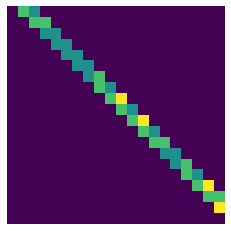

In [220]:
## defining the connectivity matrix
## coefficient (i,j) is 1 if the masses are connected and 0 if the masses are not connected

A = np.eye(n, n, 1) + np.eye(n, n, 2)
# We display a graphic representation of
# the matrix.

# manipulating the connectivity matrix A.
for i in range(n):
    for j in range (n):
        A[i,j] = A[i,j] * ((mass_array[i] * mass_array[j])/(0.1**2))**0.5

# plotting matrix A
f, ax = plt.subplots(1, 1)
ax.imshow(A)
ax.set_axis_off()

# The Length Matrix $L$

The length matrix describes the length of the bars between different masses.

This matrix is printed out at the bottom for visualization.

When printed out, a pattern can be seen. The 0.555556 values occur in a diagonal form with alternating values of 0.5 and 0.74742356 occuring before them. To explain this, in the initial configuration at the bottom, the 0.5 is the length of the vertical $ey$ distance in between the masses which was set in the constant as 0.5. The 0.5555556 is the horizontal $ex$ distance between the masses, which, if calculated at the bottom, will equal 0.555556. Lastly, the value of 0.74742356 is the distance between masses of the diagonal bar which is essentially $ex^2 + ey^2$ according to the Pythagorean theorem and which was implemented in the code.

In [221]:
## rest length of springs

L = ly * np.eye(n, n, 1) + lx * np.eye(n, n, 2)
for i in range(n // 2 - 1):
    L[2 * i + 1, 2 * i + 2] = np.sqrt(ex**2+ey**2)
    
print(L)

[[0.         0.5        0.55555556 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.74742356 0.55555556 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.5        0.55555556 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.74742356 0.55555556
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.5
  0.55555556 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.   

In [231]:
## defining the indices of the spring connections

I, J = np.nonzero(A)

[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11
 12 12 13 13 14 14 15 15 16 16 17 17 18]
[ 1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11 12 12 13
 13 14 14 15 15 16 16 17 17 18 18 19 19]


In [224]:
## this dist() function computes the distance matrix which details the distance between any pair of masses

def dist(P):
    return np.sqrt((P[:,0]-P[:,0][:,np.newaxis])**2 +
                   (P[:,1]-P[:,1][:,np.newaxis])**2)

In [227]:
## this show_bar() function displays the system
## the springs are colored according to their tensions

def show_bar(P):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))

    # Wall.
    ax.axvline(0, color='k', lw=3)

    # Distance matrix.
    D = dist(P)

    # Get normalized elongation in [-1, 1].
    elong = np.array([D[i, j] - L[i, j]
                      for i, j in zip(I, J)])
    elong_max = np.abs(elong).max()

    # The color depends on the spring tension, which
    # is proportional to the spring elongation.
    colors = np.zeros((len(elong), 4))
    colors[:, -1] = 1  # alpha channel is 1

    # Use two different sequentials colormaps for
    # positive and negative elongations, to show
    # compression and extension in different colors.
    if elong_max > 1e-10:
        # We don't use colors if all elongations are
        # zero.
        elong /= elong_max
        pos, neg = elong > 0, elong < 0
        colors[pos] = plt.cm.copper(elong[pos])
        colors[neg] = plt.cm.bone(-elong[neg])

    # We plot the springs.
    for i, j, c in zip(I, J, colors):
        ax.plot(P[[i, j], 0],
                P[[i, j], 1],
                lw=2,
                color=c,
                )

    # We plot the masses.
    ax.plot(P[[I, J], 0], P[[I, J], 1], 'ok',)

    # We configure the axes.
    ax.axis('equal')
    ax.set_xlim(P[:, 0].min() - ex / 2,
                P[:, 0].max() + ex / 2)
    ax.set_ylim(P[:, 1].min() - ey / 2,
                P[:, 1].max() + ey / 2)
    ax.set_axis_off()

    return ax

# The Initial Configuration of the System

An important part of this project is to keep this initial configuration completely unstrained which would result in a straight horizontal bar of only the color blacks which indicates no stress in the springs of the bar. 

The color of the bar depends on the tension on the spring.

Text(0.5, 1.0, 'Initial configuration')

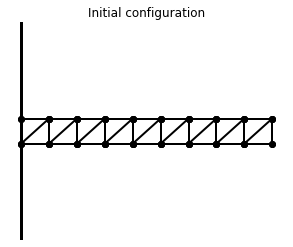

In [232]:
## the initial configuration of the system

ax = show_bar(P0)
ax.set_title("Initial configuration")

# Minimizing Potential Energy

In order to obtain the equilibrium configuration of the system, the total potentialy energy of the system must be minimized. However, in order to minimize the potential energy, we must find it first.

Therefore, the energy() function computes the total potential energy of the system with the input parameter being the position of the masses since potential energy is a function of distance/displacement.

# Background Information
The state of the system is only described by the positions of the masses.

The principle of minimum total potential energy is due to the second law of thermodynamics. Finding the equilibrium is essentially just minimizing the total potential energy of the function.

Here, we only consider the potential energy due to gravity (gravitational force, gravitational potential energy) and spring forces (elastic potential energy). We ignore any kinetic energies, because we are only interested in the equilibrium configuration.

Mathematically, let $U$ be the total potential energy of the system. $U$ can be expressed as the sum of the gravitational potential energies of the masses and the elastic potential energies of the springs.

$$U = \sum_{i=1}^n mgy_i + \frac{1}{2} \sum_{i,j=1}^n k a_{ij} \left( ||\mathbf{p}_i - \mathbf{p}j|| - l{ij} \right)^2$$

Defining some terms
* $m$: mass
* $g$: acceleration due to gravity of the Earth
* $k$: the spring stiffness of the springs
* $p_i = (x_i, y_i)$: the position of mass $i$
* $a_{ij}$: is 1 if masses $i$ and $j$ are attached by a spring and $0$ otherwise
* $I_{ij}$: the relaxed length of spring $(i,j)$ or $0$ if masses $i$ and $j$ are not attached

# The energy() Function

The energy() function implements the formula above while using vectorized computations on the arrays.

In [ ]:
## in order to find the equilibrium configuration, we must minimize the total potential energy of the system
## the energy() function computes the energy of the system given the positions of the masses

def energy(P):
    # The argument P is a vector (flattened matrix).
    # We convert it to a matrix here.
    P = P.reshape((-1, 2))
    # We compute the distance matrix.
    D = dist(P)
    # The potential energy is the sum of the
    # gravitational and elastic potential energies.
    return ((g * m * P[:, 1]).sum() +
            .5 * (k * A * (D - L)**2).sum())

In [ ]:
## computes the total potential energy of the initial configuration

energy(P0.ravel())

In [ ]:
## we assume that the 2 masses connected to the wall stay fixed to the wall (their positions cannot change)
## our constraint is that those 2 masses remain fixed on the wall (remain in their initial positions) while other masses have no such constraint
## this establishes the bounds for which the minimize() function (in the next cell) can use to minimize the potential energy of the system while keeping the constraint in mind

bounds = np.c_[P0[:2, :].ravel(),
               P0[:2, :].ravel()].tolist() + \
    [[None, None]] * (2 * (n - 2))

In [ ]:
P1 = opt.minimize(energy, P0.ravel(),
                  method='Powell',
                  bounds=bounds).x.reshape((-1, 2))

# The Equilibrium Configuration of the System

The equilibrium configuration shows the system with its total potential energy minimized, meaning that it would display the system as if it were impacted by gravitational potential energy and elastic potential energy.

In [ ]:
## displays the equilibrium/stable configuration of the system

ax = show_bar(P1)
ax.set_title("Equilibrium configuration")

# Question 1: Part 1

(1) Increase the number of masses in the system, while keeping the length of the bar constant, for several values of number of masses. are the results you obtain physically plausible?


I increased the number of masses gradually (20, 50, 100, 200) while keeping the length between the masses constant (5.0 for the full length of the bar regardless of the amount of masses) and displayed the results.

# Explaining constants

The original variable $e$ which was the initial distance between the masses was split up into its two components, $ex$, $ey$.

Our goal is to keep the length of the bar $L$ constant. Therefore, we would need to manipulate the horizontal length $ex$ to be in terms of the length $L$ and $n$ since $L$ cannot change.

The variable $ex$ is the horizontal length. The reason $ex=\frac{L}{\frac{n}{2}-1}$ is because according to the geometry, the relaxed length of the springs $L$ needs to be divided by the amount of springs in between each mass. For each spring, there are two masses for each spring, $\frac{n}{2}$, and accounting for the extra mass (let's say the mass attached to the wall) $\frac{n}{2}-1$. Therefore, $ex=\frac{L}{\frac{n}{2}-1}$ describes the horizontal length between the masses.

The variable $ey$ is the vertical length which is set to 0.5 arbitrarily.

The variables $lx$ and $ly$ are equal to $ex$ and $ey$ respectively, parallel to $l=e$ in the original code just to mimic the original code and to be more descriptive in the later code.

The rest of the code was changed with the fact that the variable $e$ was split up into two components, $ex$ and $ey$. 

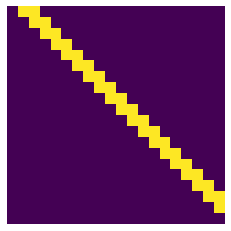

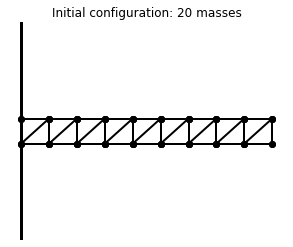

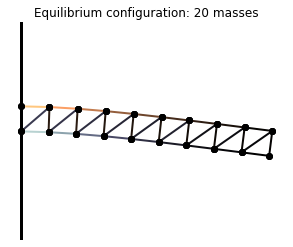

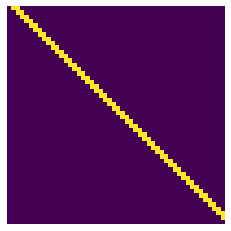

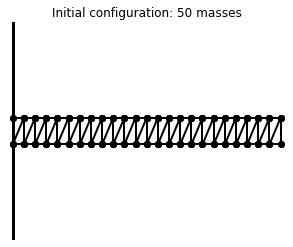

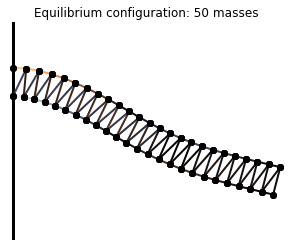

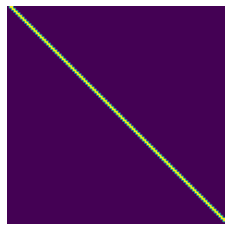

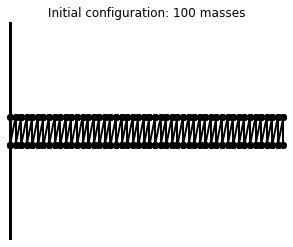

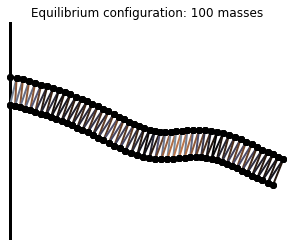

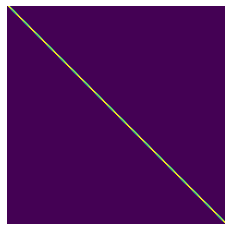

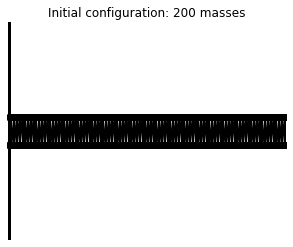

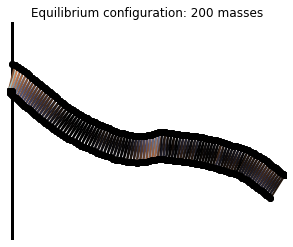

In [188]:
num = [20, 50, 100, 200]

for number in num:
    ## defining constants
    
    g = 9.81  # gravity of Earth

    m = .1  # mass, in kg
    n = number  # number of masses

    L = 5.0  # relaxed length of the springs
    k = 10000 # spring stiffness

    ex = L/((n/2) - 1) # horizontal length between the masses (x-component of e)
    ey = 0.5 # vertical length between the masses (y-component of e)

    lx = ex
    ly = ey
    
    
    ## defining initial positions of masses
    ## arranged on a 2-dimensional grid for the bottom and top points for each mass
    P0 = np.zeros((n, 2))
    P0[:, 0] = np.repeat(ex * np.arange(n // 2), 2)
    P0[:, 1] = np.tile((0, -ey), n // 2)
    
    
    ## defining the connectivity matrix
    ## coefficient (i,j) is 1 if the masses are connected and 0 if the masses are not connected
    A = np.eye(n, n, 1) + np.eye(n, n, 2)

    # We display a graphic representation of
    # the matrix.
    f, ax = plt.subplots(1, 1)
    ax.imshow(A)
    ax.set_axis_off()

    
    ## rest length of springs
    L = ly * np.eye(n, n, 1) + lx * np.eye(n, n, 2)
    for i in range(n // 2 - 1):
        L[2 * i + 1, 2 * i + 2] = np.sqrt(lx**2 + ly**2)

        
    ## defining the indices of the spring connections
    I, J = np.nonzero(A)

    
    ## this dist() function computes the distance matrix which details the distance between any pair of masses
    def dist(P):
        return np.sqrt((P[:,0]-P[:,0][:,np.newaxis])**2 +
                       (P[:,1]-P[:,1][:,np.newaxis])**2)

    
    ## this show_bar() function displays the system
    ## the springs are colored according to their tensions
    def show_bar(P):
        fig, ax = plt.subplots(1, 1, figsize=(5, 4))

        # Wall.
        ax.axvline(0, color='k', lw=3)

        # Distance matrix.
        D = dist(P)

        # Get normalized elongation in [-1, 1].
        elong = np.array([D[i, j] - L[i, j]
                          for i, j in zip(I, J)])
        elong_max = np.abs(elong).max()

        # The color depends on the spring tension, which
        # is proportional to the spring elongation.
        colors = np.zeros((len(elong), 4))
        colors[:, -1] = 1  # alpha channel is 1

        # Use two different sequentials colormaps for
        # positive and negative elongations, to show
        # compression and extension in different colors.
        if elong_max > 1e-10:
            # We don't use colors if all elongations are
            # zero.
            elong /= elong_max
            pos, neg = elong > 0, elong < 0
            colors[pos] = plt.cm.copper(elong[pos])
            colors[neg] = plt.cm.bone(-elong[neg])

        # We plot the springs.
        for i, j, c in zip(I, J, colors):
            ax.plot(P[[i, j], 0],
                    P[[i, j], 1],
                    lw=2,
                    color=c,
                    )

        # We plot the masses.
        ax.plot(P[[I, J], 0], P[[I, J], 1], 'ok',)

        # We configure the axes.
        ax.axis('equal')
        ax.set_xlim(P[:, 0].min() - ex / 2,
                    P[:, 0].max() + ex / 2)
        ax.set_ylim(P[:, 1].min() - ey / 2,
                    P[:, 1].max() + ey / 2)
        ax.set_axis_off()

        return ax
    
    
    ax = show_bar(P0)
    ax.set_title("Initial configuration: {} masses".format(n))
    
    
    ## in order to find the equilibrium configuration, we must minimize the total potential energy of the system
    ## the energy() function computes the energy of the system given the positions of the masses
    def energy(P):
        # The argument P is a vector (flattened matrix).
        # We convert it to a matrix here.
        P = P.reshape((-1, 2))
        # We compute the distance matrix.
        D = dist(P)
        # The potential energy is the sum of the
        # gravitational and elastic potential energies.
        return ((g * m * P[:, 1]).sum() +
                .5 * (k * A * (D - L)**2).sum())

    
    ## computes the total potential energy of the initial configuration
    energy(P0.ravel())
    
    
    ## we assume that the 2 masses connected to the wall stay fixed to the wall (their positions cannot change)
    ## our constraint is that those 2 masses remain fixed on the wall (remain in their initial positions) while other masses have no such constraint
    ## this establishes the bounds for which the minimize() function (in the next cell) can use to minimize the potential energy of the system while keeping the constraint in mind
    bounds = np.c_[P0[:2, :].ravel(),
               P0[:2, :].ravel()].tolist() + \
    [[None, None]] * (2 * (n - 2))
    
    P1 = opt.minimize(energy, P0.ravel(),
                  method='Powell',
                  bounds=bounds).x.reshape((-1, 2))
    
    ax = show_bar(P1)
    ax.set_title("Equilibrium configuration: {} masses".format(n))

# Question 1: Part 1 Analysis

While keeping the length constant and increasing the number of masses, the equilibrium configuration ended up having similar structure and shape with the last system (100 masses) being the most defined in shape. For example, for all 4 systems, we can observe a stretch in the springs (yellow color - programmed in the show_bar() function) and a compression of the springs (blue color - programmed in the show_bar() function) both with the left-most masses closer to the wall. The rest of the system has a lot less stressed compared to the initial masses. However, interestingly, in the system with 100 and 200 masses, this seems to occur a second time towards the halfway point on the bar (horizontally), however with the bottom springs being stretched (yellow color) and the top springs being compressed (blue) which is the opposite of those closer to the wall on the left-side.

In terms of plausibility, I can believe that this behavior is plausible because it does not violate any preconceived and observed ideas about the physical world such as bending beyond the vertical wall which is not physically possible in my opinion since I have never observed this behavior before. The tension in the springs can allow the end (right-side) of the system to bend in different ways which would explain why the bar does not just drop. 

I would improve my code by adding a lot more masses to the system and observing the behavior (which was not done here due to the limited computational resources I was given). This would have allowed me to better understand the system if it were brought to an extreme.

# Question 1: Part 2 

(1) Repeat the process by keeping the initial distance among the masses constant.

I increased the number of masses exactly like Part 1. However, for each of the number of masses, I needed to keep the horizontal distance between the masses constant (keeping $ex$ constant) which meant the full length of the bar $L$ needed to be manipulated according to the amount of masses.

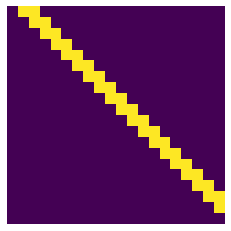

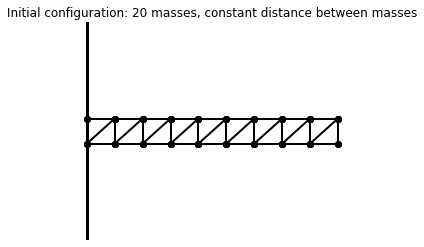

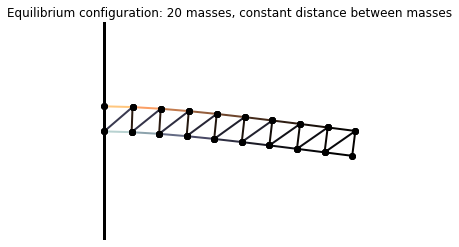

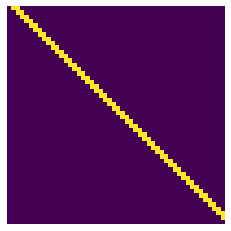

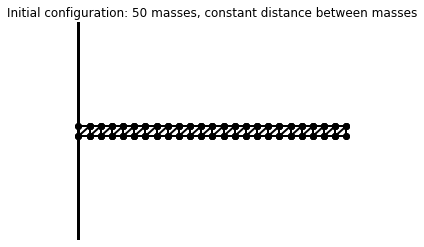

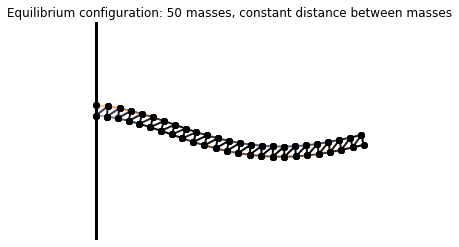

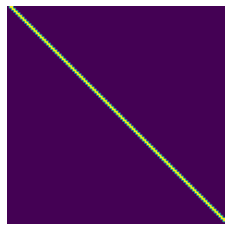

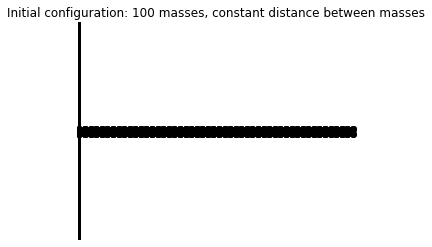

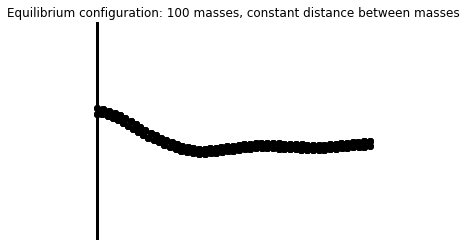

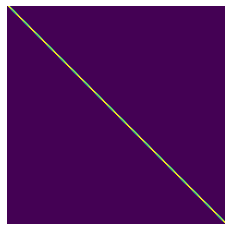

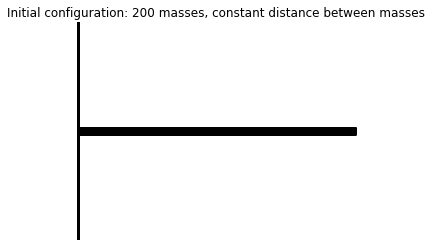

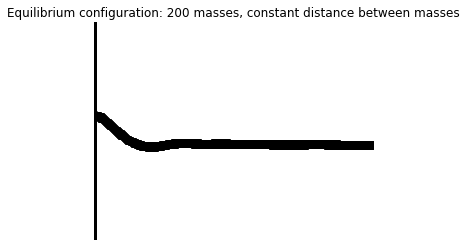

In [236]:
num = [20, 50, 100, 200]
lengths = [5.0, 40/3, 245/9, 55]

for index, number in enumerate(num):
    ## defining constants

    g = 9.81  # gravity of Earth

    m = .1  # mass, in kg
    n = number  # number of masses

    L = lengths[index]  # relaxed length of the springs
    k = 10000 # spring stiffness

    ex = L/((n/2) - 1) # horizontal length between the masses (x-component of e)
    ey = 0.5 # vertical length between the masses (y-component of e)

    lx = ex
    ly = ey


    ## defining initial positions of masses
    ## arranged on a 2-dimensional grid for the bottom and top points for each mass
    P0 = np.zeros((n, 2))
    P0[:, 0] = np.repeat(ex * np.arange(n // 2), 2)
    P0[:, 1] = np.tile((0, -ey), n // 2)


    ## defining the connectivity matrix
    ## coefficient (i,j) is 1 if the masses are connected and 0 if the masses are not connected
    A = np.eye(n, n, 1) + np.eye(n, n, 2)

    # We display a graphic representation of
    # the matrix.
    f, ax = plt.subplots(1, 1)
    ax.imshow(A)
    ax.set_axis_off()


    ## rest length of springs
    L = ly * np.eye(n, n, 1) + lx * np.eye(n, n, 2)
    for i in range(n // 2 - 1):
        L[2 * i + 1, 2 * i + 2] = np.sqrt(lx**2 + ly**2)


    ## defining the indices of the spring connections
    I, J = np.nonzero(A)


    ## this dist() function computes the distance matrix which details the distance between any pair of masses
    def dist(P):
        return np.sqrt((P[:,0]-P[:,0][:,np.newaxis])**2 +
                       (P[:,1]-P[:,1][:,np.newaxis])**2)


    ## this show_bar() function displays the system
    ## the springs are colored according to their tensions
    def show_bar(P):
        fig, ax = plt.subplots(1, 1, figsize=(5, 4))

        # Wall.
        ax.axvline(0, color='k', lw=3)

        # Distance matrix.
        D = dist(P)

        # Get normalized elongation in [-1, 1].
        elong = np.array([D[i, j] - L[i, j]
                          for i, j in zip(I, J)])
        elong_max = np.abs(elong).max()

        # The color depends on the spring tension, which
        # is proportional to the spring elongation.
        colors = np.zeros((len(elong), 4))
        colors[:, -1] = 1  # alpha channel is 1

        # Use two different sequentials colormaps for
        # positive and negative elongations, to show
        # compression and extension in different colors.
        if elong_max > 1e-10:
            # We don't use colors if all elongations are
            # zero.
            elong /= elong_max
            pos, neg = elong > 0, elong < 0
            colors[pos] = plt.cm.copper(elong[pos])
            colors[neg] = plt.cm.bone(-elong[neg])

        # We plot the springs.
        for i, j, c in zip(I, J, colors):
            ax.plot(P[[i, j], 0],
                    P[[i, j], 1],
                    lw=2,
                    color=c,
                    )

        # We plot the masses.
        ax.plot(P[[I, J], 0], P[[I, J], 1], 'ok',)

        # We configure the axes.
        ax.axis('equal')
        ax.set_xlim(P[:, 0].min() - ex / 2,
                    P[:, 0].max() + ex / 2)
        ax.set_ylim(P[:, 1].min() - ey / 2,
                    P[:, 1].max() + ey / 2)
        ax.set_axis_off()

        return ax


    ax = show_bar(P0)
    ax.set_title("Initial configuration: {} masses, constant distance between masses".format(n))


    ## in order to find the equilibrium configuration, we must minimize the total potential energy of the system
    ## the energy() function computes the energy of the system given the positions of the masses
    def energy(P):
        # The argument P is a vector (flattened matrix).
        # We convert it to a matrix here.
        P = P.reshape((-1, 2))
        # We compute the distance matrix.
        D = dist(P)
        # The potential energy is the sum of the
        # gravitational and elastic potential energies.
        return ((g * m * P[:, 1]).sum() +
                .5 * (k * A * (D - L)**2).sum())


    ## computes the total potential energy of the initial configuration
    energy(P0.ravel())


    ## we assume that the 2 masses connected to the wall stay fixed to the wall (their positions cannot change)
    ## our constraint is that those 2 masses remain fixed on the wall (remain in their initial positions) while other masses have no such constraint
    ## this establishes the bounds for which the minimize() function (in the next cell) can use to minimize the potential energy of the system while keeping the constraint in mind
    bounds = np.c_[P0[:2, :].ravel(),
               P0[:2, :].ravel()].tolist() + \
    [[None, None]] * (2 * (n - 2))

    P1 = opt.minimize(energy, P0.ravel(),
                  method='Powell',
                  bounds=bounds).x.reshape((-1, 2))

    ax = show_bar(P1)
    ax.set_title("Equilibrium configuration: {} masses, constant distance between masses".format(n))

# Question 1: Part 2 Analysis

Similar to Question 1: Part 1, there seems to be a pattern with keeping the horizontal distance between masses ($ex$) constant with the increasing number of masses. The system with only 20 masses looks very similar to that of Question 1: Part 1 with the top springs closest to the wall being stretched (yellow color) and the bottom springs near the wall being compressed (blue color). This can also be observed in the other 3 systems. However, as the number of masses start to increase, starting from 50 masses, this pattern can be seen to occur towards the middle (horizontally) of the system in a opposite manner; the bottom springs are stretched and the top springs are compressed which is the opposite configuration compared to the springs closer to the wall on the leftside. As the number of masses increase once more (at 100 masses), we can see that this pattern repeats again with less amplitude/manignitude/intensity. And finally with the last system of 200 masses, we can assume that this pattern repeats again leaving a snake-like shape to the bar with altering stretching/compression of the springs.

These patterns may occur in order to balance out the system. Minimizing the potential energy of the system may lead to the initial (left-most) springs being weighted down due to the mass of the entire bar. The snake-like shapes can be counteracting this initial weight since it is alternating, causing the snake-like pattern that we can observe here.

For the last system with 200 masses, it seems like the bar starts to straighten our horizontally which can be physically plausible due to the springs between the masses and potentially to counteract the previous bending sequences.

# Question 2

(2) Now suppose there is a certain proportion $Q$ of masses that are heavier, namely of mass $\tilde m=2m$. Modify the code below so that these heavier masses are randomly distributed in the system.

I needed to randomly distribute heavier masses throughout the system according to $Q$ which was arbitrarily set to 0.5. I displayed the systems with varying masses (20, 50, 100, 200) similar to Question 1.

# Creating a mass array

We created an array of the masses of the system in order to randomly distribute the heavier masses throughout the system. This was not needed before due to the fact that all of the masses in the system were the same. The indices for this array will match the indices for the connectivity matrix $A$.

# Defining more constants

The heavier mass $M$ is twice the mass of the original mass $m$.

The mass distribution $Q$ is the ratio of heavier masses to regular masses. The heavier masses will be randomly distributed throughout the system. This value is arbitrarily set to 0.5 for now.

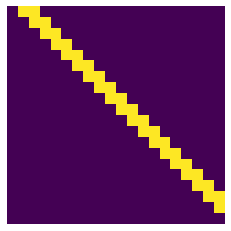

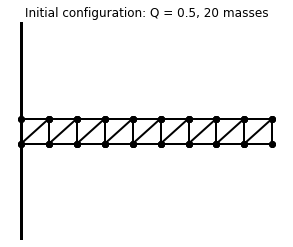

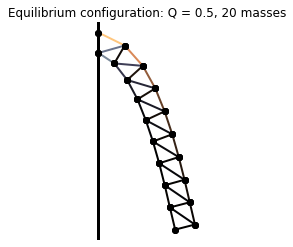

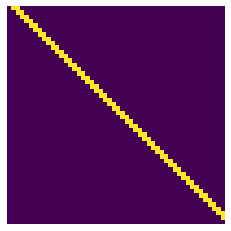

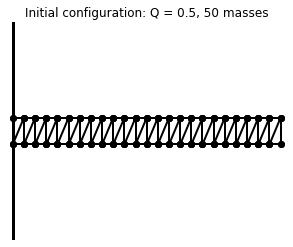

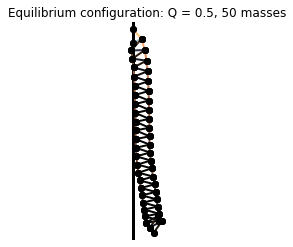

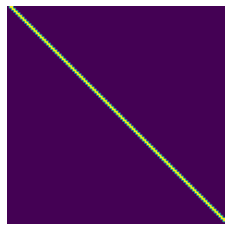

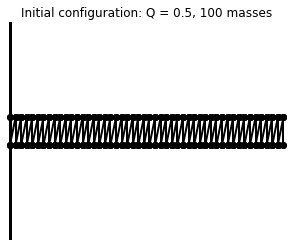

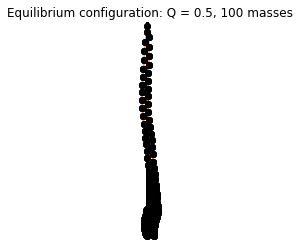

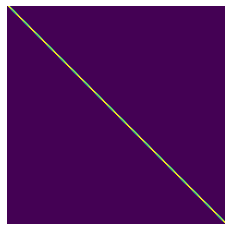

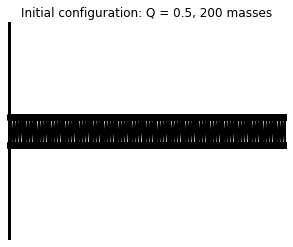

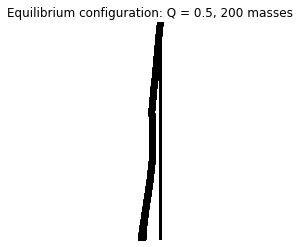

In [190]:
## importing the randrange() function from random which randomly selects any element from a specified range
from random import randrange

num = [20, 50, 100, 200]

for number in num:
    ## defining constants
    
    g = 9.81  # gravity of Earth

    m = .1  # mass, in kg
    n = number  # number of masses

    L = 5.0  # relaxed length of the springs
    k = 10000 # spring stiffness

    ex = L/((n/2) - 1) # horizontal length between the masses (x-component of e)
    ey = 0.5 # vertical length between the masses (y-component of e)

    lx = ex
    ly = ey
    
    M = 2*m
    Q = 0.5
    
    
    ## creating a mass array, mass_array
    mass_array = np.zeros((n, 1)) 

    # populate mass_array
    for i in range(n):
            mass_array[i] = m

    # populate mass_array with randomly distributed heavier masses
    for p in range(int(Q*n)):
        rand_index = randrange(n)
        mass_array[rand_index] = M
    
    ## defining initial positions of masses
    ## arranged on a 2-dimensional grid for the bottom and top points for each mass
    P0 = np.zeros((n, 2))
    P0[:, 0] = np.repeat(ex * np.arange(n // 2), 2)
    P0[:, 1] = np.tile((0, -ey), n // 2)
    
    
    ## defining the connectivity matrix
    ## coefficient (i,j) is 1 if the masses are connected and 0 if the masses are not connected
    A = np.eye(n, n, 1) + np.eye(n, n, 2)


    # We display a graphic representation of
    # the matrix.
    f, ax = plt.subplots(1, 1)
    ax.imshow(A)
    ax.set_axis_off()

    
    ## rest length of springs
    L = ly * np.eye(n, n, 1) + lx * np.eye(n, n, 2)
    for i in range(n // 2 - 1):
        L[2 * i + 1, 2 * i + 2] = np.sqrt(lx**2 + ly**2)

        
    ## defining the indices of the spring connections
    I, J = np.nonzero(A)

    
    ## this dist() function computes the distance matrix which details the distance between any pair of masses
    def dist(P):
        return np.sqrt((P[:,0]-P[:,0][:,np.newaxis])**2 +
                       (P[:,1]-P[:,1][:,np.newaxis])**2)

    
    ## this show_bar() function displays the system
    ## the springs are colored according to their tensions
    def show_bar(P):
        fig, ax = plt.subplots(1, 1, figsize=(5, 4))

        # Wall.
        ax.axvline(0, color='k', lw=3)

        # Distance matrix.
        D = dist(P)

        # Get normalized elongation in [-1, 1].
        elong = np.array([D[i, j] - L[i, j]
                          for i, j in zip(I, J)])
        elong_max = np.abs(elong).max()

        # The color depends on the spring tension, which
        # is proportional to the spring elongation.
        colors = np.zeros((len(elong), 4))
        colors[:, -1] = 1  # alpha channel is 1

        # Use two different sequentials colormaps for
        # positive and negative elongations, to show
        # compression and extension in different colors.
        if elong_max > 1e-10:
            # We don't use colors if all elongations are
            # zero.
            elong /= elong_max
            pos, neg = elong > 0, elong < 0
            colors[pos] = plt.cm.copper(elong[pos])
            colors[neg] = plt.cm.bone(-elong[neg])

        # We plot the springs.
        for i, j, c in zip(I, J, colors):
            ax.plot(P[[i, j], 0],
                    P[[i, j], 1],
                    lw=2,
                    color=c,
                    )

        # We plot the masses.
        ax.plot(P[[I, J], 0], P[[I, J], 1], 'ok',)

        # We configure the axes.
        ax.axis('equal')
        ax.set_xlim(P[:, 0].min() - ex / 2,
                    P[:, 0].max() + ex / 2)
        ax.set_ylim(P[:, 1].min() - ey / 2,
                    P[:, 1].max() + ey / 2)
        ax.set_axis_off()

        return ax
    
    
    ax = show_bar(P0)
    ax.set_title("Initial configuration: Q = {}, {} masses".format(Q, n))
    
    
    ## in order to find the equilibrium configuration, we must minimize the total potential energy of the system
    ## the energy() function computes the energy of the system given the positions of the masses
    def energy(P):
        # The argument P is a vector (flattened matrix).
        # We convert it to a matrix here.
        P = P.reshape((-1, 2))
        # We compute the distance matrix.
        D = dist(P)
        # The potential energy is the sum of the
        # gravitational and elastic potential energies.
        return ((g * mass_array * P[:, 1]).sum() +
                .5 * (k * A * (D - L)**2).sum())

    
    ## computes the total potential energy of the initial configuration
    energy(P0.ravel())
    
    
    ## we assume that the 2 masses connected to the wall stay fixed to the wall (their positions cannot change)
    ## our constraint is that those 2 masses remain fixed on the wall (remain in their initial positions) while other masses have no such constraint
    ## this establishes the bounds for which the minimize() function (in the next cell) can use to minimize the potential energy of the system while keeping the constraint in mind
    bounds = np.c_[P0[:2, :].ravel(),
               P0[:2, :].ravel()].tolist() + \
    [[None, None]] * (2 * (n - 2))
    
    P1 = opt.minimize(energy, P0.ravel(),
                  method='Powell',
                  bounds=bounds).x.reshape((-1, 2))
    
    ax = show_bar(P1)
    ax.set_title("Equilibrium configuration: Q = {}, {} masses".format(Q, n))

# Question 2 Analysis

It can be observed that similar configurations appear as the number of masses increase with the random heavier mass distribution $Q$ of 0.5 for all figures. The initial upper masses closer to the wall are stretched (yellow color) more drastically compared to those for Question 1. Simiarly, the lower masses closer to the wall are compressed more drastically compared to those for Question 1. The same can be said for the following figures with increasing number of masses. Starting with 50 masses, the system seems to look nearly unrealistic with some of the masses moving past the wall to the negative side (which is not physically possible). This is stressed even more with 100 masses and even more with 200 masses where the entire bar is on the other side of the wall which is definitely not physically possible at all.

# Question 3

(3) Change the stiffness $k$ of the springs attached to a pair of masses $(m_i,m_j)$ according to the function $k=10000*(\frac{m_im_j}{(0.1)^2)})^{0.5}$, i.e. the heavier the masses, the stiffer the spring connecting them. 

Once more, explore the resulting shape of the bar in equilibrium, and determine whether it is plausible.

N.B. There are multiple strings attached to each mass. 

I implemented the spring stiffness function $k=10000*(\frac{m_im_j}{(0.1)^2)})^{0.5}$ with varying masses (20, 50, 100, 200) using the connectivity matrix $A$ and the mass array mass_array in Question 2. The results are displayed below.

# Implementing the spring stiffness function

In the later code, in the energy() function, $k$ and $A$ will eventually be multiplied together.
The variable $k$ is already set to 10000. The variable $A$ is the connectivity matrix which is a matrix detailing whether any two masses in the system are connected (the value of 0 indicated that the masses at positions i and j are not connected and the value of 1 indicates that they are connected).
The mass_array, defined previously, contains all of the masses in the system with its index indicating its position.

Since $k$ is a function of neighboring masses and will eventually be multiplied by $A$, the code below, in the nested for loop changes the contents of $A$ to be the value multiplied by 10000 that $k$ equals. In that way, the functionality of the connectivity matrix does not change since a value of 0 indicates that the masses are not connected and a nonzero number indicates the opposite. 

Additionally, the figure indicating the visualization of the connectivity matrix has varying colors in the middle diagonals to show how the nonzero values in the connectivity matrix are different due to the mass distribution and the spring stiffness function.

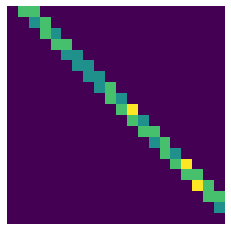

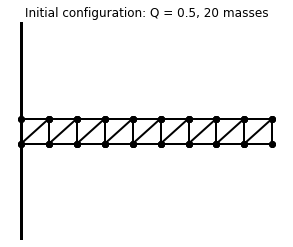

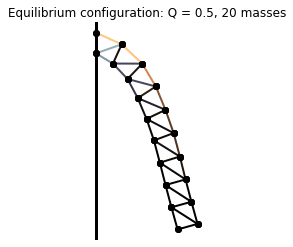

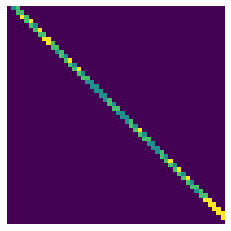

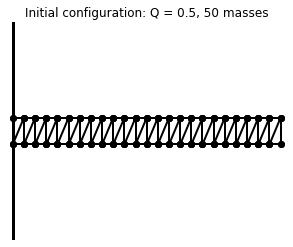

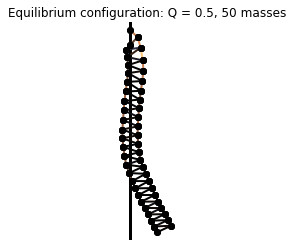

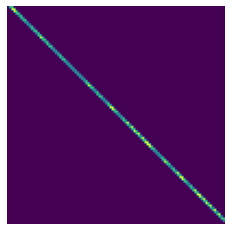

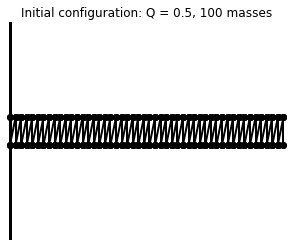

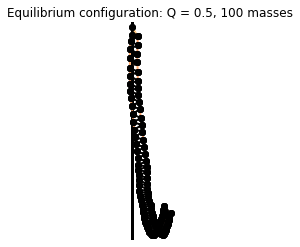

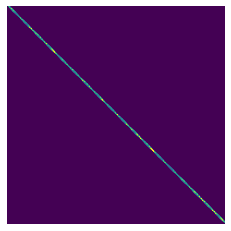

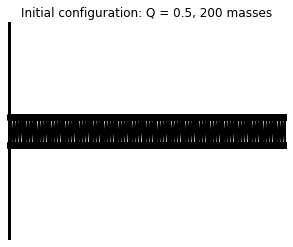

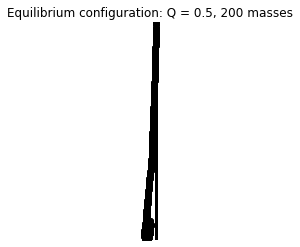

In [195]:
## importing the randrange() function from random which randomly selects any element from a specified range
from random import randrange

num = [20, 50, 100, 200]

for number in num:
    ## defining constants
    
    g = 9.81  # gravity of Earth

    m = .1  # mass, in kg
    n = number  # number of masses

    L = 5.0  # relaxed length of the springs
    k = 10000 # spring stiffness

    ex = L/((n/2) - 1) # horizontal length between the masses (x-component of e)
    ey = 0.5 # vertical length between the masses (y-component of e)

    lx = ex
    ly = ey
    
    M = 2*m
    Q = 0.5
    
    
    ## creating a mass array, mass_array
    mass_array = np.zeros((n, 1)) 

    # populate mass_array
    for i in range(n):
            mass_array[i] = m

    # populate mass_array with randomly distributed heavier masses
    for p in range(int(Q*n)):
        rand_index = randrange(n)
        mass_array[rand_index] = M
    
    ## defining initial positions of masses
    ## arranged on a 2-dimensional grid for the bottom and top points for each mass
    P0 = np.zeros((n, 2))
    P0[:, 0] = np.repeat(ex * np.arange(n // 2), 2)
    P0[:, 1] = np.tile((0, -ey), n // 2)
    
    
    ## defining the connectivity matrix
    ## coefficient (i,j) is 1 if the masses are connected and 0 if the masses are not connected
    A = np.eye(n, n, 1) + np.eye(n, n, 2)
    
    # manipulating the connectivity matrix A.
    for i in range(n):
        for j in range (n):
            A[i,j] = A[i,j] * ((mass_array[i] * mass_array[j])/(0.1**2))**0.5

    # We display a graphic representation of
    # the matrix.
    f, ax = plt.subplots(1, 1)
    ax.imshow(A)
    ax.set_axis_off()

    
    ## rest length of springs
    L = ly * np.eye(n, n, 1) + lx * np.eye(n, n, 2)
    for i in range(n // 2 - 1):
        L[2 * i + 1, 2 * i + 2] = np.sqrt(lx**2 + ly**2)

        
    ## defining the indices of the spring connections
    I, J = np.nonzero(A)

    
    ## this dist() function computes the distance matrix which details the distance between any pair of masses
    def dist(P):
        return np.sqrt((P[:,0]-P[:,0][:,np.newaxis])**2 +
                       (P[:,1]-P[:,1][:,np.newaxis])**2)

    
    ## this show_bar() function displays the system
    ## the springs are colored according to their tensions
    def show_bar(P):
        fig, ax = plt.subplots(1, 1, figsize=(5, 4))

        # Wall.
        ax.axvline(0, color='k', lw=3)

        # Distance matrix.
        D = dist(P)

        # Get normalized elongation in [-1, 1].
        elong = np.array([D[i, j] - L[i, j]
                          for i, j in zip(I, J)])
        elong_max = np.abs(elong).max()

        # The color depends on the spring tension, which
        # is proportional to the spring elongation.
        colors = np.zeros((len(elong), 4))
        colors[:, -1] = 1  # alpha channel is 1

        # Use two different sequentials colormaps for
        # positive and negative elongations, to show
        # compression and extension in different colors.
        if elong_max > 1e-10:
            # We don't use colors if all elongations are
            # zero.
            elong /= elong_max
            pos, neg = elong > 0, elong < 0
            colors[pos] = plt.cm.copper(elong[pos])
            colors[neg] = plt.cm.bone(-elong[neg])

        # We plot the springs.
        for i, j, c in zip(I, J, colors):
            ax.plot(P[[i, j], 0],
                    P[[i, j], 1],
                    lw=2,
                    color=c,
                    )

        # We plot the masses.
        ax.plot(P[[I, J], 0], P[[I, J], 1], 'ok',)

        # We configure the axes.
        ax.axis('equal')
        ax.set_xlim(P[:, 0].min() - ex / 2,
                    P[:, 0].max() + ex / 2)
        ax.set_ylim(P[:, 1].min() - ey / 2,
                    P[:, 1].max() + ey / 2)
        ax.set_axis_off()

        return ax
    
    
    ax = show_bar(P0)
    ax.set_title("Initial configuration: Q = {}, {} masses".format(Q, n))
    
    
    ## in order to find the equilibrium configuration, we must minimize the total potential energy of the system
    ## the energy() function computes the energy of the system given the positions of the masses
    def energy(P):
        # The argument P is a vector (flattened matrix).
        # We convert it to a matrix here.
        P = P.reshape((-1, 2))
        # We compute the distance matrix.
        D = dist(P)
        # The potential energy is the sum of the
        # gravitational and elastic potential energies.
        return ((g * mass_array * P[:, 1]).sum() +
                .5 * (k * A * (D - L)**2).sum())

    
    ## computes the total potential energy of the initial configuration
    energy(P0.ravel())
    
    
    ## we assume that the 2 masses connected to the wall stay fixed to the wall (their positions cannot change)
    ## our constraint is that those 2 masses remain fixed on the wall (remain in their initial positions) while other masses have no such constraint
    ## this establishes the bounds for which the minimize() function (in the next cell) can use to minimize the potential energy of the system while keeping the constraint in mind
    bounds = np.c_[P0[:2, :].ravel(),
               P0[:2, :].ravel()].tolist() + \
    [[None, None]] * (2 * (n - 2))
    
    P1 = opt.minimize(energy, P0.ravel(),
                  method='Powell',
                  bounds=bounds).x.reshape((-1, 2))
    
    ax = show_bar(P1)
    ax.set_title("Equilibrium configuration: Q = {}, {} masses".format(Q, n))

# Question 3 Analysis

A somewhat recognizable pattern can be observed in these systems. The first system with 20 masses looks very similar to the first system of Question 2 with the upper masses closer to the wall being stretched (yellow color) and the bottom masses closer to the wall being compressed (blue color). The rest of the system seems to be fairly unaltered (black color). In the connectivity diagram, the diagonal is no longer fully yellow, unlike the previous 2 questions. This is because of the way the spring stiffness function $k$ was implemented. I utilized the connectivity matrix and the mass array to implement the $k$ function, therefore changing the values of the connectivity matrix depending on the mass distribution which, in Question 2, where randomly distributed throughout. Therefore, in all 4 of the system's connectivity diagram, the colors are varying and random which makes sense. The orientation of the figures start to produce a pattern. For instance, the initial bending of the system (the springs closer to the wall) can be observed in all 4 systems. From that, for the 50-mass system, another stretch/compress pattern can be seen roughly halfway on the bar. For the 100-mass system, although it may be more difficult to interpret/see, the snake-like pattern seems to repeat again. And the same can be assumed for the final configuration. For the last 3 bars, the end of each bar seem to be moving upward to some degree which is another similarity between the graphs.

The last system is clearly not physically plausible because the bar cannot physically be in the region of the vertical wall. Additionally, the 2 masses attached to the wall are programmed to not be able to move, so the bar cannot physically move past the wall. Perhaps with better computational resources, more masses and experimentation can take place to better inform the answer to this question. For now, this is the most I accomplished for this question. Perhaps this physically-inplausible behavior is due to the way the spring stiffness function is implemented, or just the code generally not accounting for the fact that the bar cannot physically move past the vertical wall.

# Question 4

(4) Consider a number of masses up to $n=10^3$ (if your computational resources allow it), and find which is the optimal proportion $Q$ of heavier masses that, on average, will maximize bending of the bar. 

N.B. you will need to test which optimization strategy is the most reliable in finding a realistic equilibrium shape. Address any issue with the convergence of the optimization algorithms.

# Finding the optimal proportion $Q$ that maximizes the bending of the bar

# Defining new constants

I defined the variable $nq$ to be the number of values of $Q$ that I wanted to test.

The array q_values stores the $Q$ values that I want to test which is divided into $nq$ parts evenly between 0 and 1 because the value of $Q$ can only be between (and including) 0 and 1 since it is a proportion.

Then, I put all of the code into a for loop with differing values of $Q$ to see what would happen.

The value of $n$, the number of masses, is constant and set arbitrarily to 40 masses to observe the change in the system depending on the $Q$ value.

I also created a variable called the drop_differences_list which is a list that stores the drop differences for each value of $Q$.

# Finding the center of mass

In order to find the center of mass for a given system, you must take the masses and multiply each by their positions. Then, sum all of these values together and divide by the sum of all masses. This value will indicate where the center of mass is located in the system.

# Computing the drop difference and comparing

I calculated the drop difference, stored in the variable drop_difference which is essentially the difference in the center of mass in the initial configuration to the equilibrium configuration. This is the value we want to maximize. The results are graphed below comparing the drop difference and the value of $Q$.

Here, I altered the question a little bit. I wanted to experiment more with different values of $Q$ rather than try to run the program with 1000 masses. I have previously tried with 1000 masses and I could not get my program to run (it took way too long). So, I decided to improvise with the limited computational resources I was given.

System 1 

Q: 0.0 	Drop difference: 5.289393291447955 

System 2 

Q: 0.16666666666666666 	Drop difference: 5.357640495670571 

System 3 

Q: 0.3333333333333333 	Drop difference: 4.868264572272566 

System 4 

Q: 0.5 	Drop difference: 4.419073456446397 

System 5 

Q: 0.6666666666666666 	Drop difference: 5.432735212962136 

System 6 

Q: 0.8333333333333333 	Drop difference: 5.032759450175645 

System 7 

Q: 1.0 	Drop difference: 5.2159268519375495 



<ipython-input-240-23c46dbe6a22>:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(5, 4))


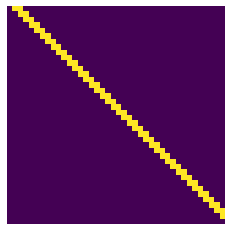

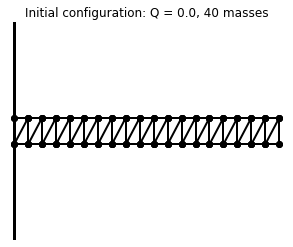

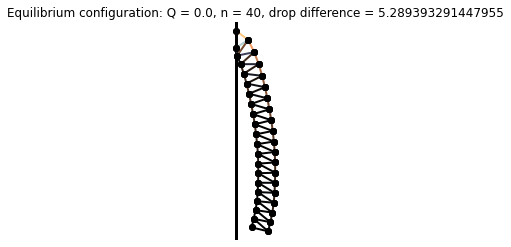

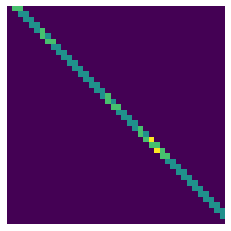

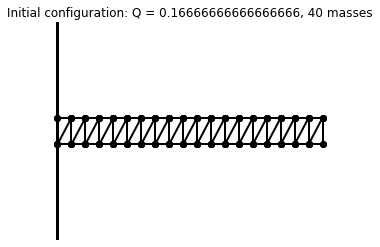

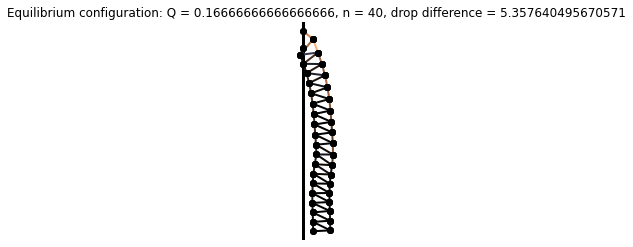

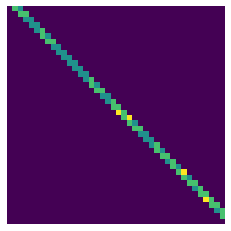

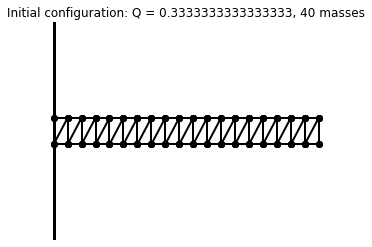

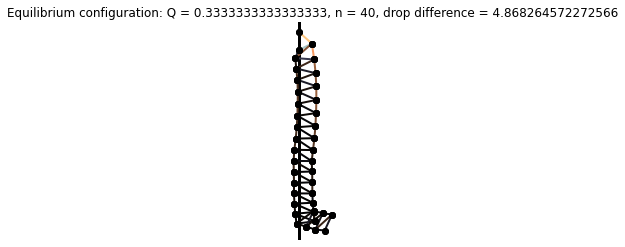

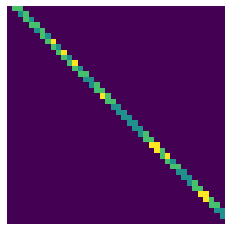

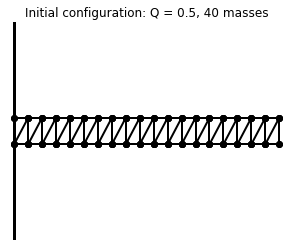

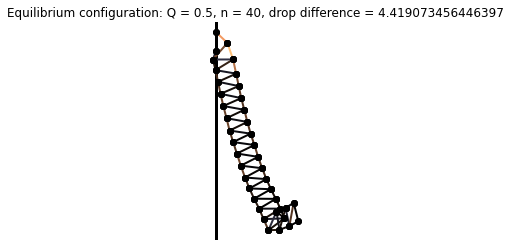

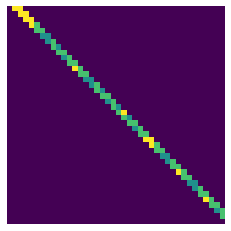

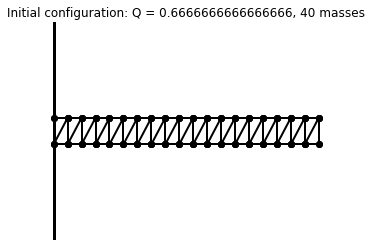

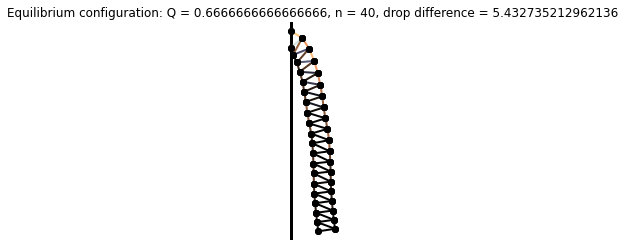

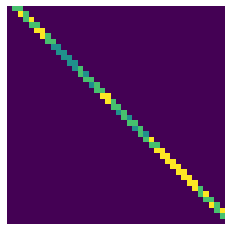

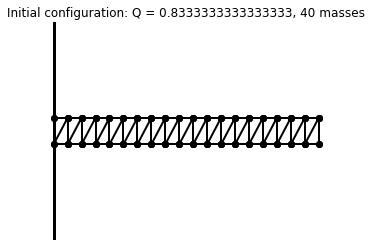

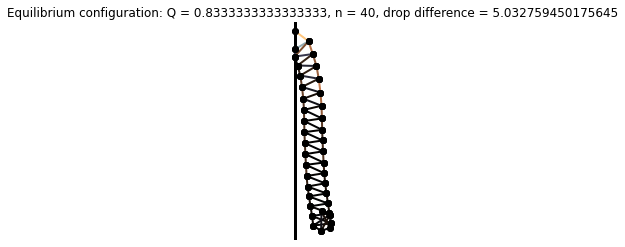

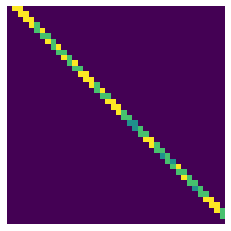

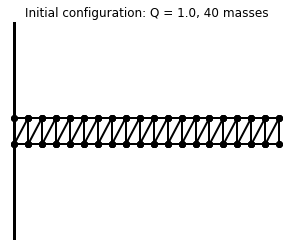

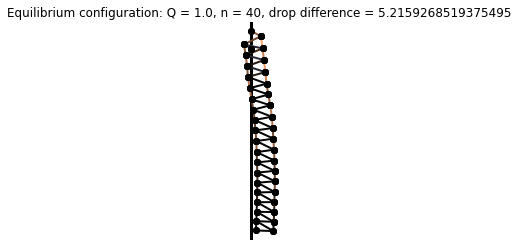

In [240]:
## defining new constants
nq = 7 # number of values of Q
q_values = np.linspace(0, 1, nq)
drop_difference_list = []

for q in q_values:
    ## defining constants
    
    g = 9.81  # gravity of Earth

    m = .1  # mass, in kg
    n = 40  # number of masses

    L = 5.0  # relaxed length of the springs
    k = 10000 # spring stiffness

    ex = L/((n/2) - 1) # horizontal length between the masses (x-component of e)
    ey = 0.5 # vertical length between the masses (y-component of e)

    lx = ex
    ly = ey
    
    M = 2*m
    Q = q
    
    
    ## creating a mass array, mass_array
    mass_array = np.zeros((n, 1)) 

    # populate mass_array
    for i in range(n):
            mass_array[i] = m

    # populate mass_array with randomly distributed heavier masses
    for p in range(int(Q*n)):
        rand_index = randrange(n)
        mass_array[rand_index] = M
    
    ## defining initial positions of masses
    ## arranged on a 2-dimensional grid for the bottom and top points for each mass
    P0 = np.zeros((n, 2))
    P0[:, 0] = np.repeat(ex * np.arange(n // 2), 2)
    P0[:, 1] = np.tile((0, -ey), n // 2)
    
    
    ## defining the connectivity matrix
    ## coefficient (i,j) is 1 if the masses are connected and 0 if the masses are not connected
    A = np.eye(n, n, 1) + np.eye(n, n, 2)
    
    # manipulating the connectivity matrix A.
    for i in range(n):
        for j in range (n):
            A[i,j] = A[i,j] * ((mass_array[i] * mass_array[j])/(0.1**2))**0.5

    # We display a graphic representation of
    # the matrix.
    f, ax = plt.subplots(1, 1)
    ax.imshow(A)
    ax.set_axis_off()

    
    ## rest length of springs
    L = ly * np.eye(n, n, 1) + lx * np.eye(n, n, 2)
    for i in range(n // 2 - 1):
        L[2 * i + 1, 2 * i + 2] = np.sqrt(lx**2 + ly**2)

        
    ## defining the indices of the spring connections
    I, J = np.nonzero(A)

    
    ## this dist() function computes the distance matrix which details the distance between any pair of masses
    def dist(P):
        return np.sqrt((P[:,0]-P[:,0][:,np.newaxis])**2 +
                       (P[:,1]-P[:,1][:,np.newaxis])**2)

    
    ## this show_bar() function displays the system
    ## the springs are colored according to their tensions
    def show_bar(P):
        fig, ax = plt.subplots(1, 1, figsize=(5, 4))

        # Wall.
        ax.axvline(0, color='k', lw=3)

        # Distance matrix.
        D = dist(P)

        # Get normalized elongation in [-1, 1].
        elong = np.array([D[i, j] - L[i, j]
                          for i, j in zip(I, J)])
        elong_max = np.abs(elong).max()

        # The color depends on the spring tension, which
        # is proportional to the spring elongation.
        colors = np.zeros((len(elong), 4))
        colors[:, -1] = 1  # alpha channel is 1

        # Use two different sequentials colormaps for
        # positive and negative elongations, to show
        # compression and extension in different colors.
        if elong_max > 1e-10:
            # We don't use colors if all elongations are
            # zero.
            elong /= elong_max
            pos, neg = elong > 0, elong < 0
            colors[pos] = plt.cm.copper(elong[pos])
            colors[neg] = plt.cm.bone(-elong[neg])

        # We plot the springs.
        for i, j, c in zip(I, J, colors):
            ax.plot(P[[i, j], 0],
                    P[[i, j], 1],
                    lw=2,
                    color=c,
                    )

        # We plot the masses.
        ax.plot(P[[I, J], 0], P[[I, J], 1], 'ok',)

        # We configure the axes.
        ax.axis('equal')
        ax.set_xlim(P[:, 0].min() - ex / 2,
                    P[:, 0].max() + ex / 2)
        ax.set_ylim(P[:, 1].min() - ey / 2,
                    P[:, 1].max() + ey / 2)
        ax.set_axis_off()

        return ax
    
    
    ax = show_bar(P0)
    ax.set_title("Initial configuration: Q = {}, {} masses".format(Q, n))
    
    
    ## in order to find the equilibrium configuration, we must minimize the total potential energy of the system
    ## the energy() function computes the energy of the system given the positions of the masses
    def energy(P):
        # The argument P is a vector (flattened matrix).
        # We convert it to a matrix here.
        P = P.reshape((-1, 2))
        # We compute the distance matrix.
        D = dist(P)
        # The potential energy is the sum of the
        # gravitational and elastic potential energies.
        return ((g * mass_array * P[:, 1]).sum() +
                .5 * (k * A * (D - L)**2).sum())

    
    ## computes the total potential energy of the initial configuration
    energy(P0.ravel())
    
    
    ## we assume that the 2 masses connected to the wall stay fixed to the wall (their positions cannot change)
    ## our constraint is that those 2 masses remain fixed on the wall (remain in their initial positions) while other masses have no such constraint
    ## this establishes the bounds for which the minimize() function (in the next cell) can use to minimize the potential energy of the system while keeping the constraint in mind
    bounds = np.c_[P0[:2, :].ravel(),
               P0[:2, :].ravel()].tolist() + \
    [[None, None]] * (2 * (n - 2))
    
    P1 = opt.minimize(energy, P0.ravel(),
                  method='Powell',
                  bounds=bounds).x.reshape((-1, 2))
    
    ## calculating the center of mass
    
    
    ## calculating the drop difference
    drop_difference = P0[n-1, 1] - P1[n-1, 1]
    
    ax = show_bar(P1)
    ax.set_title("Equilibrium configuration: Q = {}, n = {}, drop difference = {}".format(Q, n, drop_difference))
    
    drop_difference_list.append(drop_difference)
    
## displaying the results (Q vs drop difference)
for ind, i in enumerate(q_values):
    print("System", ind+1, "\n")
    print("Q:", i, "\tDrop difference:", drop_difference_list[ind], "\n")
    

# Question 4 Analysis

Observationally, all of the systems with increasing $Q$ values do not differ that drastically from each other compared to the configurations observed in the previous questions. I also printed out the $Q$ values and their corresponding drop differences above the graphs/visual displays so we can better compare them.

There are only slight differences in the equilibrium configurations. With $Q=0.0$ (meaning that all of the masses in the system are $m$ - no heavier masses $M$ exist in the system), the system seem to curve in the same way we have seen in the previous questions (the upper springs closer to the wall stretching (yellow color) and the lower springs closer to the wall compressing (blue color)). This can be observed in all of the other systems as well. The shape looks more uniform and less disorderly which makes physical sense since all of the masses would be the same. For $Q=0.166666$, there a little bit of heavier masses randomly distributed throughout the system which alters the shape of the system slightly. It is no longer as uniform as the previous figure which makes sense due to the fact that the mass distribution and the center of mass has changed. Moving onto the next values for $Q$, $Q=0.3333$, now $1/3$ of the masses in the system as heavier which alters the bar's shape even more compared to the last configuration. The stretch/compression of the springs near the wall is stronger due to the fact that the bar, as a whole, has now become heavier compared to the last two configurations, due to more of the masses in the system being heavier. Additionally, the end of the bar can be seen to flare upward which is a behavior observed in the bar configurations Question 3. With half of the system's masses being the heavier mass, $Q=0.5$, the configuration looks slightly altered compared to the previous configuration. This is by far the lowest drop difference compared to all of the other configurations. The final three configurations look oddly more physically normal compared to the previous couple, apart from the second to last,$Q=0.833333$, having the flare-up-behavior previously mentioned. Similar to the analysis for the lower values of $Q$, having a larger majority of a certain mass (meaning having the $Q$ value closer to 0 or 1) will cause the behavior of the system to behave more physically normal compared to the numbers in between where there is more variety in the distribution of heavier and regular masses.

The $Q$ value with the largest drop difference is $Q=0.6666$.
The $Q$ value with the lowest drop difference is $Q=0.5$

However, there can definitely be improvements on the method I used which could have better informed the results that I obtained. I explain this in the next section.

# Improvements

For this question, I believe that I should have devoted more time in researching how to compute the center of mass for each system and computing the drop difference of those values rather than fixed points. This would have been a better form of finding the optimal value of $Q$ since the distribution of the masses would be random and varied, resulting in difference centers of mass. Essentially, the center of mass would depend on the mass distribution which is clearly random for each system. The way I implemented it was using fixed points which would be too generic and oversimplified, especially for more complex systems with random distributions. Additionally, presenting the data in a nicer, compact, and concise manner would have been beneficial to understanding the complexity and correlation between $Q$ values and their corresponding drop differences. For instance, composing a graph of $Q$ values versus the corresponding drop differences can help to better visualize a potential trend or observe the visual relationship between the two.

Other improvements could be experimenting with whether the amount of masses will change the drop differences. With the limited computational time and systems that I am given, unfortunately, I could not make the $n$ anywhere close to $n=10^3$. Therefore, I just set the value to be $n=40$ and focused more on the change in the visualization of the systems and the similarities/differences in the drop differences of those systems. With better computational resources, potentially diving further into this would be more informative to discover more about this project.

This can also be applied to the project as a whole. Experimenting with the extremes ($n=10^3$) would definitely help inform the project a little bit better for all questions. This is the work and progress that I have made with the computational resources and time I was given, however, I would wish to potentially pursue further work to discover more about this project if I were given better and faster computational resources!

# Final Comments

This project as a whole has been very helpful and interesting in my opinion. The whole world of computational sciences in physics, math, and computer science, has never been something that was appealing to me or that I knew much about at all, but working on challenging projects such as this for nearly half of the semester was very eye-opening and fascinating. Before, I never saw a direct path between the two fields of study that I am pursuing (I am currently double majoring in Physics and Computer Science) and this class definitely better informed me about that bridge. For parting questions about this project, I wonder is better computational resources would have enhanced the discoveries that I could make on this project. Additionally, I would love to experiment with more altering factors of the project simultaneously, such as differing values of $Q$ with different $k$ functions, different number of masses $n$, and others. These can create interesting shapes that can help to inform the project a little bit more. Overall, this project was very interesting and definitely helped me with my academic studies and career direction.